In [1]:
%load_ext autoreload
%autoreload 2

In [124]:
from Wind.Results import DBResults, DBMeasures
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal, mongolocalmeasures
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.genmod.generalized_linear_model import GLM
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [406]:
query={'experiment':'CNN_s2s_best', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)

In [407]:
results.sample(0.5)
sample=results.extract_result()

In [408]:
measure = DBMeasures(conn=mongolocalmeasures)

measure.retrieve_measures()

In [409]:
measure.measures.remove('SampEnt')


In [410]:
data_dic = {}
for v in measure.variables:
    for m in measure.measures:
        try:
            data_dic[f'{v}_{m}'] = measure.extract_measure_sites(sites= sample[:,0], var=v, measure=m)[:,1]
        except KeyError:
            print(f'{v} {m} fails')
            pass
data_dic['pred'] = sample[:,1]

data = pd.DataFrame(data_dic).dropna()

wind_direction_cos Trend12h fails
wind_direction_cos Season12h fails
wind_direction_cos Trend24h fails
wind_direction_cos Season24h fails
wind_direction_cos Trend1m fails
wind_direction_cos Season1m fails
wind_direction_sin Trend12h fails
wind_direction_sin Season12h fails
wind_direction_sin Trend24h fails
wind_direction_sin Season24h fails
wind_direction_sin Trend1m fails
wind_direction_sin Season1m fails


In [411]:
data.shape

(63304, 103)

In [412]:
scaler = StandardScaler()
data.iloc[:,0:-1] = scaler.fit_transform(data.iloc[:,0:-1].to_numpy())
data

,wind_speed_SpecEnt,wind_speed_Stab12h,wind_speed_Lump12h,wind_speed_Stab24h,wind_speed_Lump24h,wind_speed_Stab1w,wind_speed_Lump1w,wind_speed_Stab1m,wind_speed_Lump1m,wind_speed_Stab3m,...,wind_direction_sin_Lump24h,wind_direction_sin_Stab1w,wind_direction_sin_Lump1w,wind_direction_sin_Stab1m,wind_direction_sin_Lump1m,wind_direction_sin_Stab3m,wind_direction_sin_Lump3m,wind_direction_sin_Stab6m,wind_direction_sin_Lump6m,pred
0,-1.023015,-1.077342,-1.240668,-0.811016,-1.475862,-0.047509,-0.317648,0.214332,-0.055326,0.222569,...,-0.654983,0.670684,0.683515,0.508875,0.384228,0.630905,0.439540,0.211486,1.933123,7.513440
1,-0.910605,1.204630,0.404849,1.341617,0.432544,1.829802,1.175460,1.381421,1.950725,1.298472,...,-1.239616,1.138783,-0.613557,2.135435,-0.162235,2.528230,-0.274395,0.285745,1.645298,7.544673
2,-1.730389,-0.279134,-0.829444,-0.027689,-0.623295,0.446608,0.567214,0.692364,0.577773,0.573335,...,-0.035371,1.079100,0.610799,1.206542,0.469474,1.162437,0.824978,0.754784,0.466374,7.822860
3,1.456819,-0.504801,-0.110161,-0.539117,-0.287133,-0.593745,-0.399263,-0.726947,-0.445938,-0.659156,...,0.331537,-0.850543,-0.418059,-0.757723,-0.198560,-0.608972,0.037378,-1.048200,0.090690,6.008623
4,0.091020,1.143040,1.151225,1.270228,1.073567,0.851027,1.792473,0.403783,1.659704,0.287189,...,0.146956,2.335861,2.154785,2.684781,2.586413,2.409656,2.549247,2.805109,2.434541,7.231582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63341,-0.049492,0.208480,-0.171802,0.019737,0.189541,-0.431015,-0.319819,-0.651923,-0.401416,-0.742351,...,1.676841,1.041782,1.663439,1.206625,1.460092,1.149447,1.703050,1.403732,0.220656,7.308587
63342,-0.823903,-0.064838,-0.545332,-0.131445,-0.539549,-0.017206,-0.748582,-0.152662,-0.477274,0.067657,...,0.934094,0.509552,0.908258,0.059913,0.534699,-0.138046,0.217336,-0.771334,-0.254519,7.507408
63343,-0.006762,-0.190090,-0.350481,-0.297510,-0.216724,-0.417447,-0.703667,-0.658648,-0.586298,-0.609260,...,1.370987,0.988114,1.300367,0.968590,1.102200,0.759909,0.960311,0.758529,-0.599846,6.892269
63344,-1.557039,1.626042,0.908998,1.608593,0.773416,2.239069,0.911482,2.774658,1.284759,2.756893,...,-0.623029,-1.390951,-0.682109,-1.241459,0.074759,-1.054335,0.519921,-0.521944,0.010110,7.229080


<AxesSubplot:>

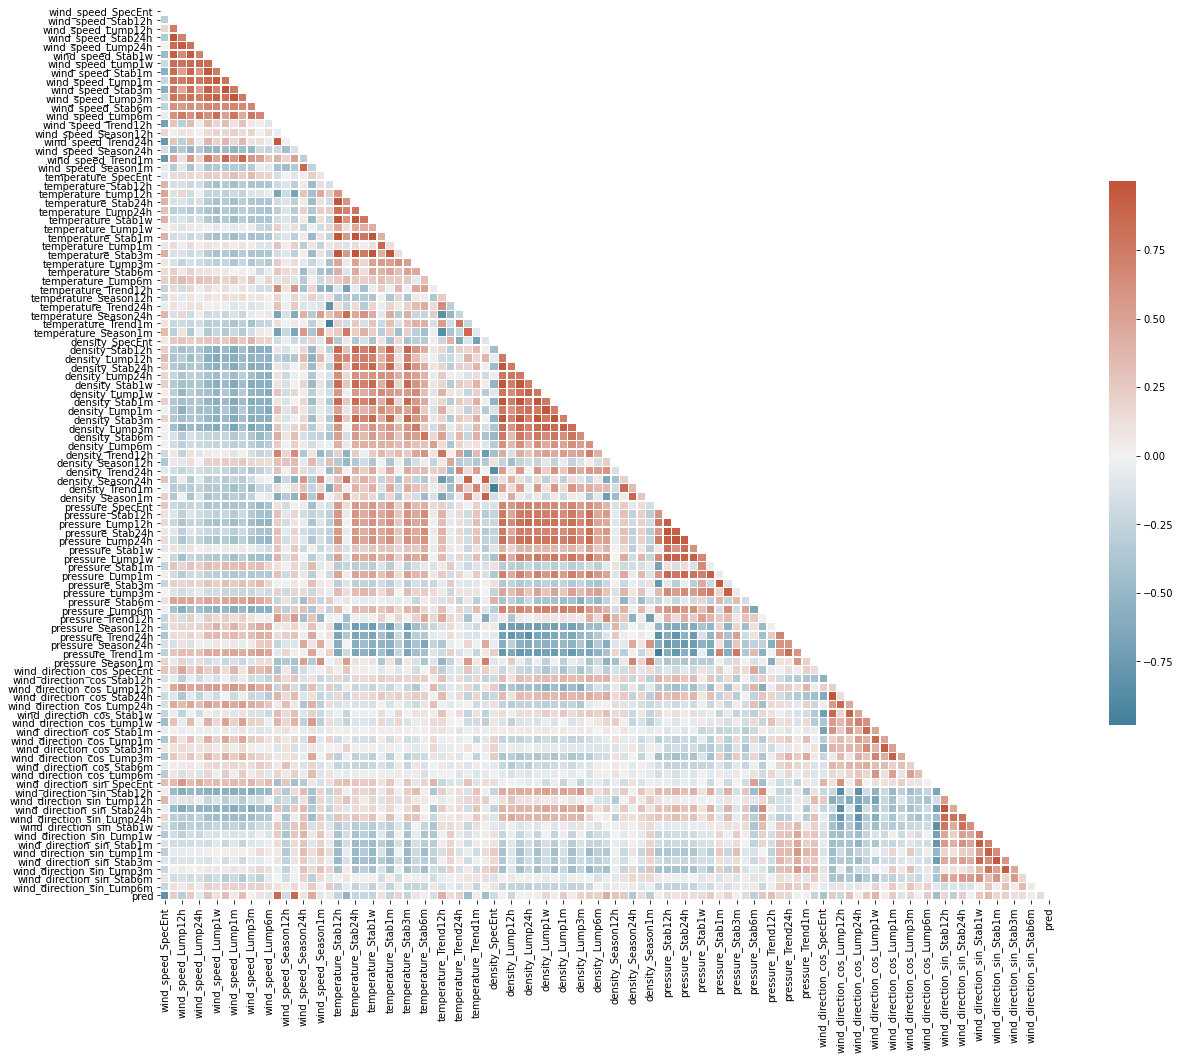

In [413]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [414]:
for v in data.columns:
    print(v)

wind_speed_SpecEnt
wind_speed_Stab12h
wind_speed_Lump12h
wind_speed_Stab24h
wind_speed_Lump24h
wind_speed_Stab1w
wind_speed_Lump1w
wind_speed_Stab1m
wind_speed_Lump1m
wind_speed_Stab3m
wind_speed_Lump3m
wind_speed_Stab6m
wind_speed_Lump6m
wind_speed_Trend12h
wind_speed_Season12h
wind_speed_Trend24h
wind_speed_Season24h
wind_speed_Trend1m
wind_speed_Season1m
temperature_SpecEnt
temperature_Stab12h
temperature_Lump12h
temperature_Stab24h
temperature_Lump24h
temperature_Stab1w
temperature_Lump1w
temperature_Stab1m
temperature_Lump1m
temperature_Stab3m
temperature_Lump3m
temperature_Stab6m
temperature_Lump6m
temperature_Trend12h
temperature_Season12h
temperature_Trend24h
temperature_Season24h
temperature_Trend1m
temperature_Season1m
density_SpecEnt
density_Stab12h
density_Lump12h
density_Stab24h
density_Lump24h
density_Stab1w
density_Lump1w
density_Stab1m
density_Lump1m
density_Stab3m
density_Lump3m
density_Stab6m
density_Lump6m
density_Trend12h
density_Season12h
density_Trend24h
density_S

In [415]:
model = GLM.from_formula(f'pred ~ wind_speed_Trend12h + wind_speed_SpecEnt', data)
result = model.fit()
print(result.summary())
print('R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63304
Model:                            GLM   Df Residuals:                    63301
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                        0.096645
Method:                          IRLS   Log-Likelihood:                -15862.
Date:                Tue, 27 Oct 2020   Deviance:                       6117.8
Time:                        10:53:27   Pearson chi2:                 6.12e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8782    

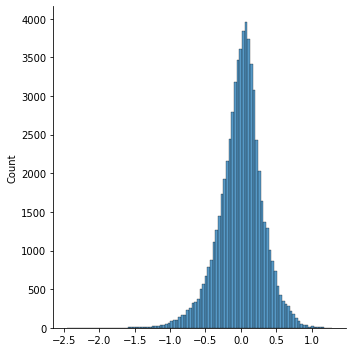

In [416]:

sns.displot(result.resid_response,bins=100);

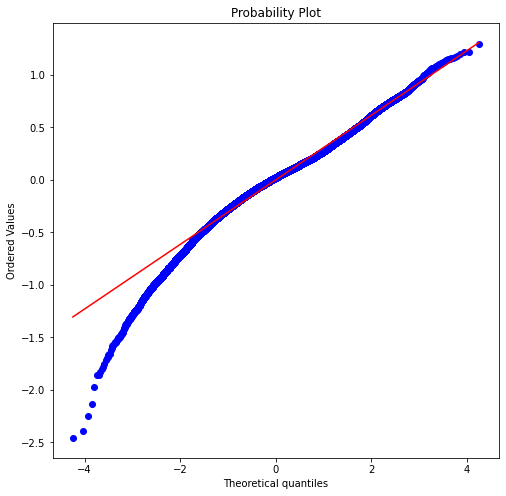

In [417]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

In [418]:
for v in data.columns:
    if v != 'pred':
        model = GLM.from_formula(f'pred ~ {v}', data)
        result = model.fit()
        print(f' {v} - R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))    

 wind_speed_SpecEnt - R2: 0.8958024285432377
 wind_speed_Stab12h - R2: 0.6927580458849778
 wind_speed_Lump12h - R2: 0.7056618254522344
 wind_speed_Stab24h - R2: 0.6985410495789153
 wind_speed_Lump24h - R2: 0.6780675272117298
 wind_speed_Stab1w - R2: 0.7055346005679981
 wind_speed_Lump1w - R2: 0.6785214895044488
 wind_speed_Stab1m - R2: 0.7108796928811483
 wind_speed_Lump1m - R2: 0.6768814729675376
 wind_speed_Stab3m - R2: 0.7094954812327262
 wind_speed_Lump3m - R2: 0.6761213098570537
 wind_speed_Stab6m - R2: 0.6786376503904488
 wind_speed_Lump6m - R2: 0.6798790459737563
 wind_speed_Trend12h - R2: 0.9100851108866478
 wind_speed_Season12h - R2: 0.689046663184143
 wind_speed_Trend24h - R2: 0.9216627429950626
 wind_speed_Season24h - R2: 0.6791756245124354
 wind_speed_Trend1m - R2: 0.7455060697260525
 wind_speed_Season1m - R2: 0.678397107634092
 temperature_SpecEnt - R2: 0.6775428441491419
 temperature_Stab12h - R2: 0.6964198903916616
 temperature_Lump12h - R2: 0.7622587864103311
 temperatu

In [419]:
for m in measure.measures:
    form = ''
    for c in data.columns:
        if m in c:
            form += f'{c} +'
    form = form[:-2]
    model = GLM.from_formula(f'pred ~ {form}', data)
    result = model.fit()
    print(f' {m} - R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))        

 SpecEnt - R2: 0.9292428211126003
 Stab12h - R2: 0.8360504707935557
 Lump12h - R2: 0.7974677361137108
 Stab24h - R2: 0.8584572425076403
 Lump24h - R2: 0.727714352429055
 Stab1w - R2: 0.8732870882345802
 Lump1w - R2: 0.8331215198754232
 Stab1m - R2: 0.8642883813888947
 Lump1m - R2: 0.7616997369722538
 Stab3m - R2: 0.853955485823714
 Lump3m - R2: 0.7392989744027358
 Stab6m - R2: 0.7569290605252827
 Lump6m - R2: 0.7580874944825418
 Trend12h - R2: 0.9312224674290148
 Season12h - R2: 0.7293465789828275
 Trend24h - R2: 0.9237817467159448
 Season24h - R2: 0.7753769514865917
 Trend1m - R2: 0.7843068445655961
 Season1m - R2: 0.7656005309506512


In [420]:
for v in measure.variables:
    form = ''
    for c in data.columns:
        if v in c:
            form += f'{c} +'
    form = form[:-2]
    model = GLM.from_formula(f'pred ~ {form}', data)
    result = model.fit()
    print(f' {v} - R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))     

 wind_speed - R2: 0.9575916625191325
 temperature - R2: 0.8243968685357075
 density - R2: 0.8167930287583907
 pressure - R2: 0.8165000841236312
 wind_direction_cos - R2: 0.8457197751952203
 wind_direction_sin - R2: 0.839552543268385


In [421]:

form = ''
for c in data.columns:
    if c != 'pred':
        form += f'{c} +'
form = form[:-2]
model = GLM.from_formula(f'pred ~ {form}', data)
result = model.fit()
print(result.summary())
print(f' R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))     

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63304
Model:                            GLM   Df Residuals:                    63201
Model Family:                Gaussian   Df Model:                          102
Link Function:               identity   Scale:                        0.048360
Method:                          IRLS   Log-Likelihood:                 6103.3
Date:                Tue, 27 Oct 2020   Deviance:                       3056.4
Time:                        10:53:57   Pearson chi2:                 3.06e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

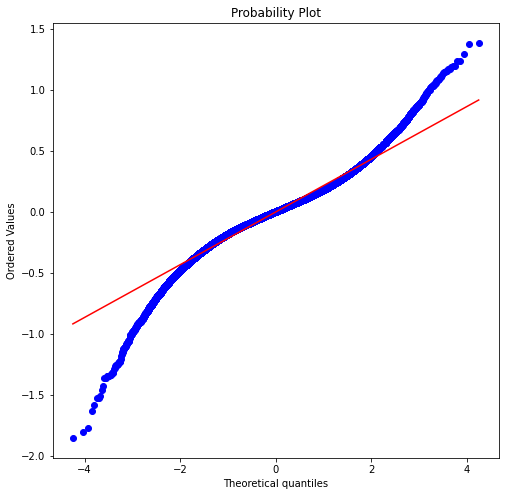

In [422]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

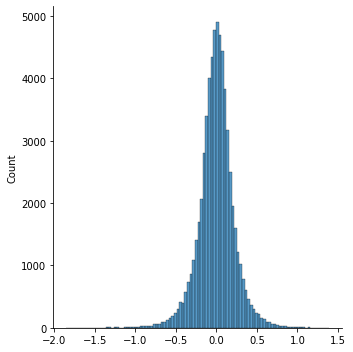

In [423]:
sns.displot(result.resid_response,bins=100);

Text(0, 0.5, 'Residuals')

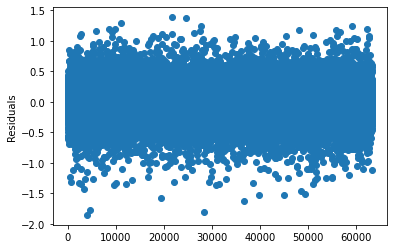

In [424]:
fig, ax = plt.subplots()
ax.scatter( range(result.resid_response.shape[0]),result.resid_response)
ax.hlines(0, 0, 1)
ax.set_ylabel('Residuals')


Text(0, 0.5, 'Residuals')

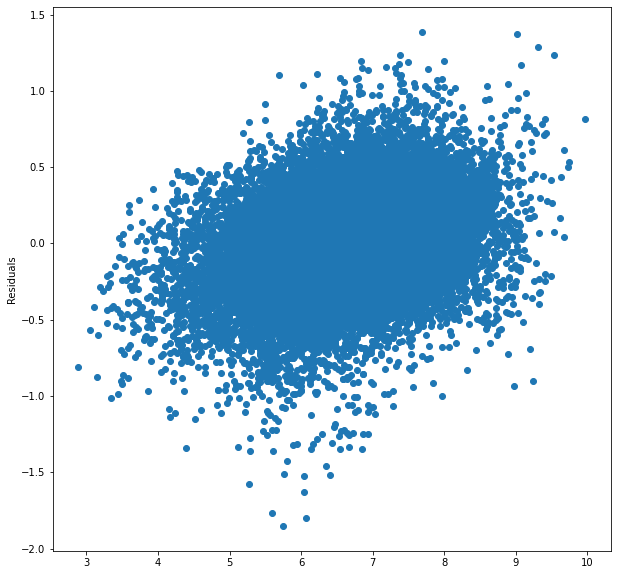

In [425]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'],result.resid_response)
ax.set_ylabel('Residuals')

In [426]:
pred = result.predict(data)

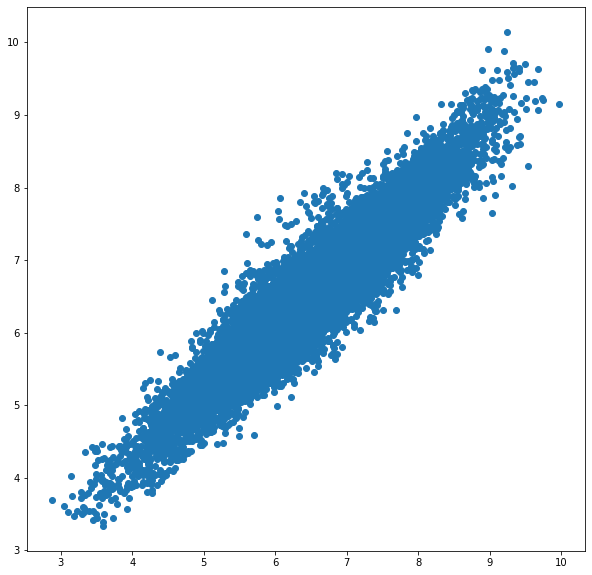

In [427]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'], pred)


In [428]:
lnvars = []
lvars = [v for v in data.columns]

In [448]:
form = ''
print(len(lvars))
for c,p in zip(lvars, result.pvalues):
    if c != 'pred' and p<0.05:
        form += f'{c} +'
        lnvars.append(c) 
form = form[:-2]
model = GLM.from_formula(f'pred ~ {form}', data)
result = model.fit()
print(result.summary())
print(f' R2:', 1-result.deviance/(len(data)-1)*np.var(sample[:,1]))    
lvars=lnvars
lnvars = []

24
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   pred   No. Observations:                63304
Model:                            GLM   Df Residuals:                    63279
Model Family:                Gaussian   Df Model:                           24
Link Function:               identity   Scale:                        0.068950
Method:                          IRLS   Log-Likelihood:                -5162.5
Date:                Tue, 27 Oct 2020   Deviance:                       4363.1
Time:                        10:56:02   Pearson chi2:                 4.36e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept          

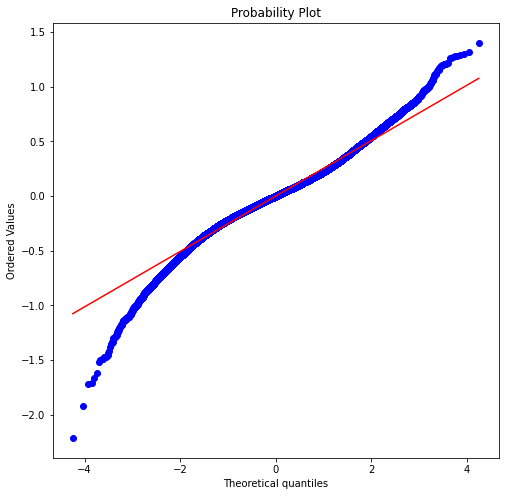

In [401]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(result.resid_response, plot=plt);

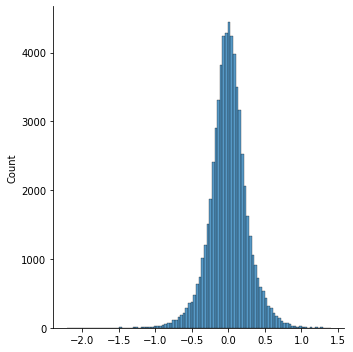

In [402]:
sns.displot(result.resid_response,bins=100);

Text(0, 0.5, 'Residuals')

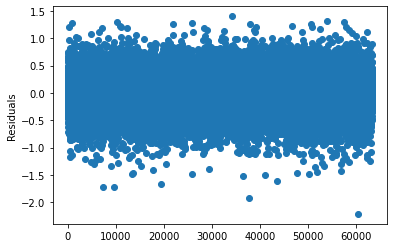

In [403]:
fig, ax = plt.subplots()
ax.scatter( range(result.resid_response.shape[0]),result.resid_response)
ax.hlines(0, 0, 1)
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

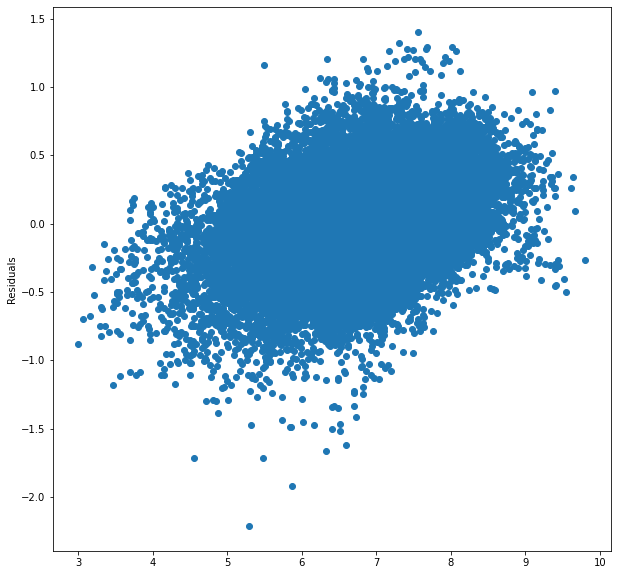

In [404]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'],result.resid_response)
ax.set_ylabel('Residuals')

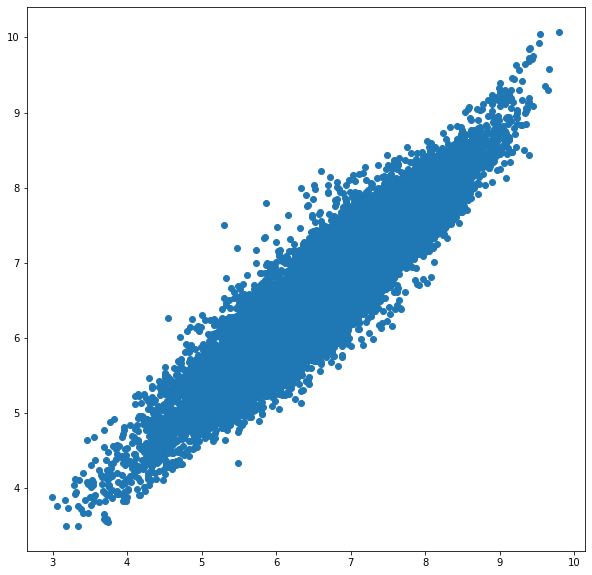

In [405]:
pred = result.predict(data)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'], pred)


In [449]:
import statsmodels.api as sm

In [453]:
rlm_model = sm.RLM.from_formula(f'pred ~ wind_speed_Trend12h + wind_speed_SpecEnt', data, M=sm.robust.norms.HuberT())

In [454]:
result = rlm_model.fit()
print(result.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:                   pred   No. Observations:                63304
Model:                            RLM   Df Residuals:                    63301
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 27 Oct 2020                                         
Time:                        11:00:44                                         
No. Iterations:                    21                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8892    

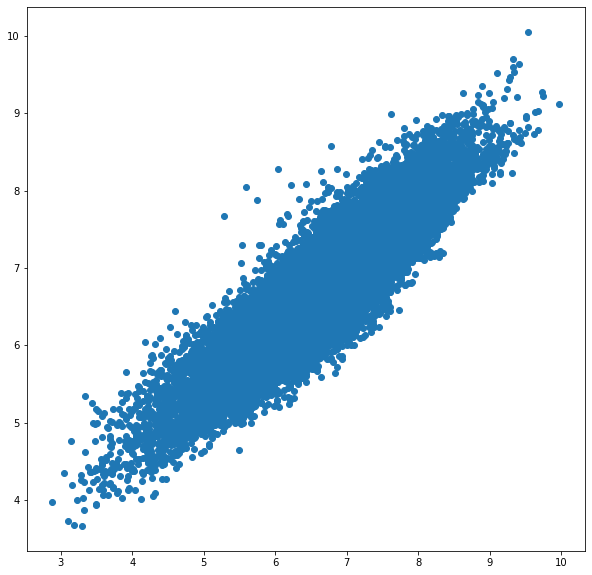

In [456]:
pred = result.predict(data)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter( data['pred'], pred)

In [457]:
r2_score( data['pred'], pred)

0.8298740371280868

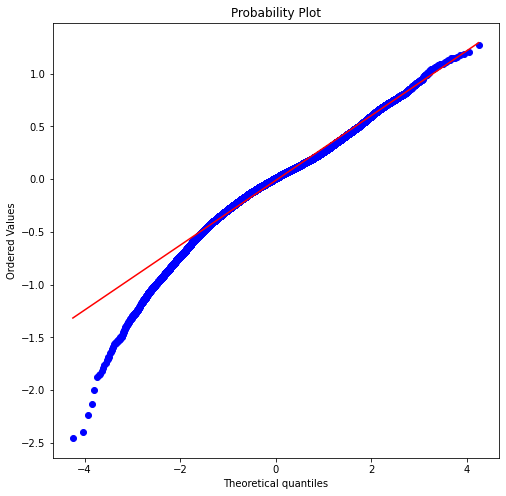

In [461]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(data['pred']- pred, plot=plt);

In [463]:
form = ''
for c in data.columns:
    if c != 'pred':
        form += f'{c} +'
form = form[:-2]
model = sm.RLM.from_formula(f'pred ~ {form}', data, M=sm.robust.norms.HuberT())
result = model.fit()
print(result.summary())
pred = result.predict(data)
print(r2_score( data['pred'], pred))

                    Robust linear Model Regression Results                    
Dep. Variable:                   pred   No. Observations:                63304
Model:                            RLM   Df Residuals:                    63201
Method:                          IRLS   Df Model:                          102
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 27 Oct 2020                                         
Time:                        11:08:48                                         
No. Iterations:                    34                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

0.9136205767301917


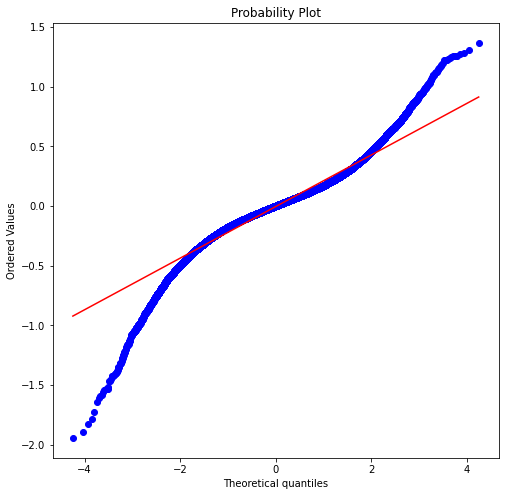

In [464]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(data['pred']- pred, plot=plt);